# Electronic Waste Notebook

This notebook is based on:
 
[1] Statistics Canada, “Table 38-10-0154-01  Electronic waste.” Statistics Canada, Jul. 18, 2022. doi: https://doi.org/10.25318/3810015401-eng. Available: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3810015401&pickMembers%5B0%5D=1.21&cubeTimeFrame.startYear=2011&cubeTimeFrame.endYear=2021&referencePeriods=20110101%2C20210101

I set the city to be Montreal only. I use this notebook to plot interesting e-waste data for the city of Montreal.

**Problems**: This dataset contains cells that have certain special notations that I handle in different ways.
  - Cells that have a `..` in them indicate that the relevant data are not available for the reference period. I treat those as `NaN` values.
  - Cells that have a `E` after their value are to be used with caution, according to Statscan. For the purposes of demonstration, I treat those values at face-value and remove the `E` from the value.
  - Cells that have a `F` in them are too unreliable to be published, according to Statscan. I treat those as `NaN` values. 

In [1]:
from pathlib import Path
from re import sub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set file path
file_path = Path('images/e_waste/')
file_path.mkdir(parents=True, exist_ok=True)

## Get all the data

In [3]:
# Read the data
e_waste = pd.read_csv('data/Electronic Waste.csv')
e_waste

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of 2,20,20,25,22,19,16
1,Put unwanted computers in the garbage 3,F,F,F,F,F,F
2,Took or sent unwanted computers to a depot or ...,30,30,41,44,50,67
3,Returned unwanted computers to a supplier or r...,F,12E,16E,21E,15E,6E
4,Donated or gave away unwanted computers 3,31E,19,F,9E,12E,16
...,...,...,...,...,...,...,...
77,Put unwanted mercury-containing lights in the ...,55,49,51,42,45,37
78,Took or sent unwanted mercury-containing light...,16E,23,22E,32,34,46
79,Returned unwanted mercury-containing lights to...,9E,13E,7E,F,8E,8E
80,Still had unwanted mercury-containing lights a...,15E,10E,15E,22E,16E,15


In [4]:
# Clean up the Electronic waste column. It has numbers at the end of each description
e_waste['Electronic waste'] = e_waste['Electronic waste'].apply(lambda x: sub(f'\d+', '', x).strip())
e_waste

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of,20,20,25,22,19,16
1,Put unwanted computers in the garbage,F,F,F,F,F,F
2,Took or sent unwanted computers to a depot or ...,30,30,41,44,50,67
3,Returned unwanted computers to a supplier or r...,F,12E,16E,21E,15E,6E
4,Donated or gave away unwanted computers,31E,19,F,9E,12E,16
...,...,...,...,...,...,...,...
77,Put unwanted mercury-containing lights in the ...,55,49,51,42,45,37
78,Took or sent unwanted mercury-containing light...,16E,23,22E,32,34,46
79,Returned unwanted mercury-containing lights to...,9E,13E,7E,F,8E,8E
80,Still had unwanted mercury-containing lights a...,15E,10E,15E,22E,16E,15


In [5]:
# Clean up data columns. Replace `F`, `..` with `NaN`  
e_waste = e_waste.replace('F', 0)
e_waste = e_waste.replace('..', 0)

# Go through the year columns. Replace all the cells with an `E` with just the number in that cell
for col in e_waste.columns[1:]:
    e_waste[col] = e_waste[col].apply(lambda x: sub(r'(\d+)E', r'\1', x) if type(x) is str else x)
e_waste

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of,20,20,25,22,19,16
1,Put unwanted computers in the garbage,0,0,0,0,0,0
2,Took or sent unwanted computers to a depot or ...,30,30,41,44,50,67
3,Returned unwanted computers to a supplier or r...,0,12,16,21,15,6
4,Donated or gave away unwanted computers,31,19,0,9,12,16
...,...,...,...,...,...,...,...
77,Put unwanted mercury-containing lights in the ...,55,49,51,42,45,37
78,Took or sent unwanted mercury-containing light...,16,23,22,32,34,46
79,Returned unwanted mercury-containing lights to...,9,13,7,0,8,8
80,Still had unwanted mercury-containing lights a...,15,10,15,22,16,15


In [6]:
# Ensure the proper types
e_waste = e_waste.astype(
    {'2011': float, '2013': float,
     '2015': float, '2017': float,
     '2019': float, '2021': float}
)
e_waste

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of,20.0,20.0,25.0,22.0,19.0,16.0
1,Put unwanted computers in the garbage,0.0,0.0,0.0,0.0,0.0,0.0
2,Took or sent unwanted computers to a depot or ...,30.0,30.0,41.0,44.0,50.0,67.0
3,Returned unwanted computers to a supplier or r...,0.0,12.0,16.0,21.0,15.0,6.0
4,Donated or gave away unwanted computers,31.0,19.0,0.0,9.0,12.0,16.0
...,...,...,...,...,...,...,...
77,Put unwanted mercury-containing lights in the ...,55.0,49.0,51.0,42.0,45.0,37.0
78,Took or sent unwanted mercury-containing light...,16.0,23.0,22.0,32.0,34.0,46.0
79,Returned unwanted mercury-containing lights to...,9.0,13.0,7.0,0.0,8.0,8.0
80,Still had unwanted mercury-containing lights a...,15.0,10.0,15.0,22.0,16.0,15.0


**Of these data, we want to focus on computers, printers, televisions, audiovisual equipment, cellular phones, landline telephones, microwave ovens, and electronic gaming equipment.**

## Process the computer-related data only

In [7]:
# Get only the computer-related data
computers = e_waste[
    (e_waste['Electronic waste'].str.contains('computers')) & (e_waste.iloc[:, 1:] != 0).any(axis=1)
    # (e_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)
computers

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of,20.0,20.0,25.0,22.0,19.0,16.0
1,Took or sent unwanted computers to a depot or ...,30.0,30.0,41.0,44.0,50.0,67.0
2,Returned unwanted computers to a supplier or r...,0.0,12.0,16.0,21.0,15.0,6.0
3,Donated or gave away unwanted computers,31.0,19.0,0.0,9.0,12.0,16.0
4,Still had unwanted computers at the time of in...,28.0,34.0,26.0,29.0,27.0,23.0


In [8]:
# From this, get only the data where the item was unwanted
had_unwanted = computers[computers['Electronic waste'] == 'Had unwanted computers to dispose of'].iloc[:, 1:]
had_unwanted

,2011,2013,2015,2017,2019,2021
0,20.0,20.0,25.0,22.0,19.0,16.0


In [9]:
# Transpose the data for easier plotting
had_unwanted = had_unwanted.T
had_unwanted = had_unwanted.reset_index()
had_unwanted = had_unwanted.rename(columns={'index': 'Year', 0: 'Percentage'})
had_unwanted

,Year,Percentage
0,2011,20.0
1,2013,20.0
2,2015,25.0
3,2017,22.0
4,2019,19.0
5,2021,16.0


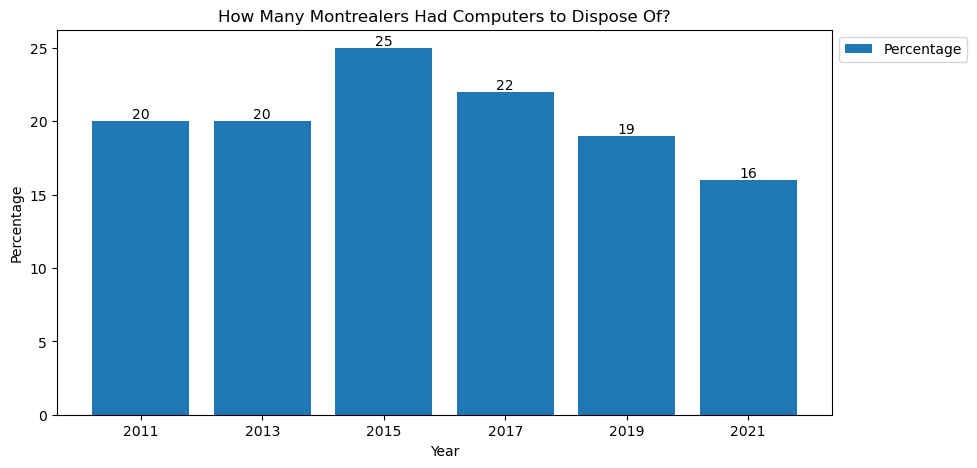

In [10]:
# Create the plot for the unwanted item data
_, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(had_unwanted['Year'], had_unwanted['Percentage'])  # Create the bars for the plot
ax.bar_label(bars)  # Add values to the tops of the bars

# Set metadata
plt.title("How Many Montrealers Had Computers to Dispose Of?")
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.legend([bars], ["Percentage"], loc='upper left', bbox_to_anchor=(1.0, 1.0))  # Ensure legend is beyond the plot

# Save plot
plt.savefig(file_path / 'computers_main_plot.png', bbox_inches='tight')

In [11]:
# Get the rest of the data. i.e. all the data except the unwanted data
rest_of_data = computers.iloc[1:].T
rest_of_data

,1,2,3,4
Electronic waste,Took or sent unwanted computers to a depot or ...,Returned unwanted computers to a supplier or r...,Donated or gave away unwanted computers,Still had unwanted computers at the time of in...
2011,30.0,0.0,31.0,28.0
2013,30.0,12.0,19.0,34.0
2015,41.0,16.0,0.0,26.0
2017,44.0,21.0,9.0,29.0
2019,50.0,15.0,12.0,27.0
2021,67.0,6.0,16.0,23.0


In [12]:
# Manipulate the DataFrame to be more appropriate for stacked bar charts

rest_of_data.columns = rest_of_data.iloc[0].values  # Set the column names to the first row

rest_of_data = rest_of_data.reset_index()
rest_of_data = rest_of_data.iloc[1:]  # Delete the first row
rest_of_data = rest_of_data.rename(columns={'index': 'Year'})
rest_of_data

,Year,Took or sent unwanted computers to a depot or drop-off centre,Returned unwanted computers to a supplier or retailer,Donated or gave away unwanted computers,Still had unwanted computers at the time of interview
1,2011,30.0,0.0,31.0,28.0
2,2013,30.0,12.0,19.0,34.0
3,2015,41.0,16.0,0.0,26.0
4,2017,44.0,21.0,9.0,29.0
5,2019,50.0,15.0,12.0,27.0
6,2021,67.0,6.0,16.0,23.0


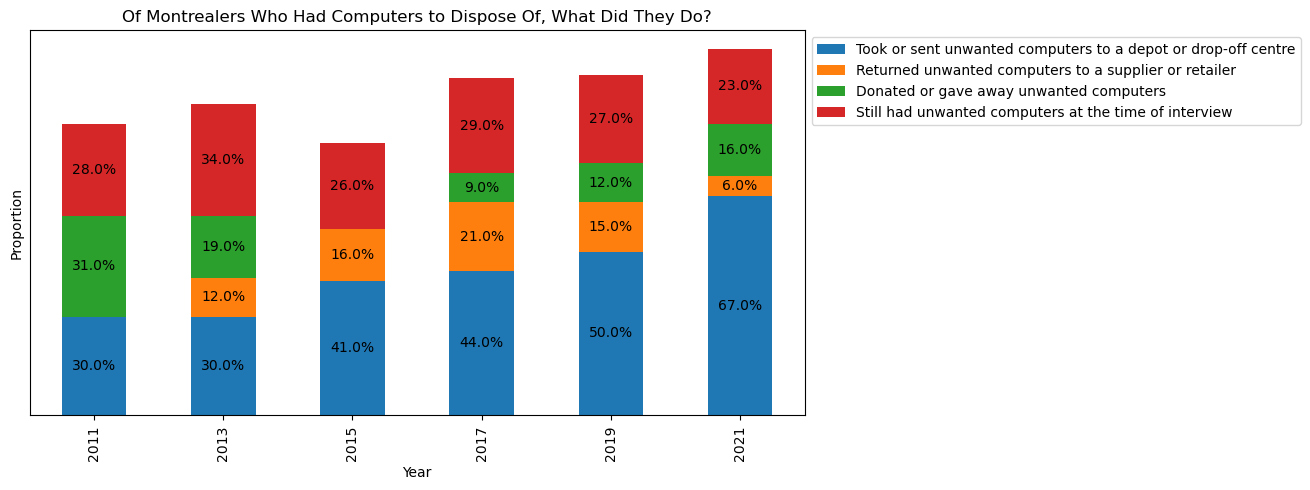

In [13]:
# Plot the stacked bar chart
ax = rest_of_data.plot(x='Year', kind='bar', stacked=True, figsize=(10, 5), title="Of Montrealers Who Had Computers to Dispose Of, What Did They Do?")

# Set metadata
plt.ylabel('Proportion')
plt.yticks([])
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Add percentages to stacks
for c in ax.containers:
    label = c.get_label()
    labels = [f"{num}%" if num != 0 else '' for num in rest_of_data[label].values]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)

# Save the plot
plt.savefig(file_path / 'computers_stacked_plot.png', bbox_inches='tight')

## Process the printer-related data only

In [14]:
# Get only the printer-related data
printers = e_waste[
    (e_waste['Electronic waste'].str.contains('printers')) & (e_waste.iloc[:, 1:] != 0).any(axis=1)
    # (e_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)

printers

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted printers to dispose of,11.0,14.0,15.0,16.0,13.0,11.0
1,Put unwanted printers in the garbage,0.0,16.0,0.0,0.0,0.0,0.0
2,Took or sent unwanted printers to a depot or d...,25.0,29.0,41.0,52.0,62.0,63.0
3,Returned unwanted printers to a supplier or re...,0.0,16.0,18.0,22.0,0.0,0.0
4,Donated or gave away unwanted printers,33.0,20.0,0.0,10.0,0.0,14.0
5,Still had unwanted printers at the time of int...,20.0,23.0,17.0,16.0,20.0,18.0


In [15]:
# From this, get only the data where the item was unwanted
had_unwanted = printers[printers['Electronic waste'] == 'Had unwanted printers to dispose of'].iloc[:, 1:]
had_unwanted

,2011,2013,2015,2017,2019,2021
0,11.0,14.0,15.0,16.0,13.0,11.0


In [16]:
# Transpose the data for easier plotting
had_unwanted = had_unwanted.T
had_unwanted = had_unwanted.reset_index()
had_unwanted = had_unwanted.rename(columns={'index': 'Year', 0: 'Percentage'})
had_unwanted

,Year,Percentage
0,2011,11.0
1,2013,14.0
2,2015,15.0
3,2017,16.0
4,2019,13.0
5,2021,11.0


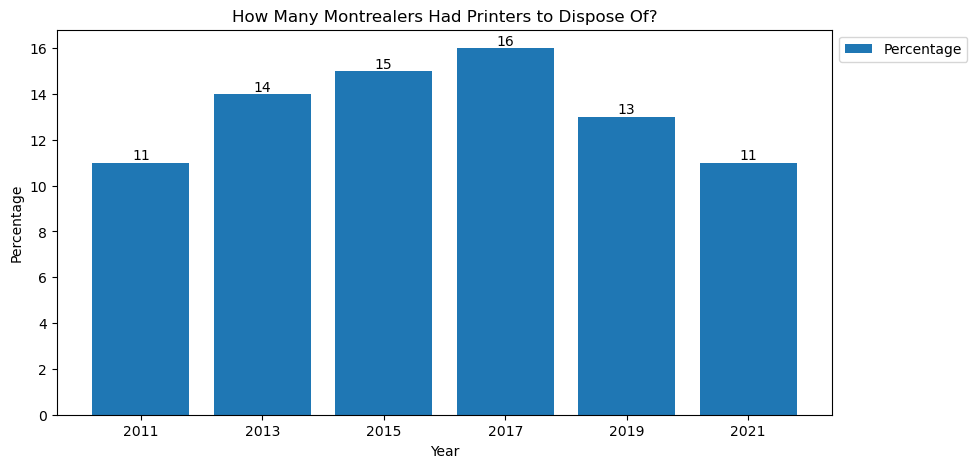

In [17]:
# Create the plot for the unwanted item data
_, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(had_unwanted['Year'], had_unwanted['Percentage'])  # Create the bars for the plot
ax.bar_label(bars)  # Add values to the tops of the bars

# Set metadata
plt.title("How Many Montrealers Had Printers to Dispose Of?")
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.legend([bars], ["Percentage"], loc='upper left', bbox_to_anchor=(1.0, 1.0))  # Ensure legend is beyond the plot

# Save plot
plt.savefig(file_path / 'printers_main_plot.png', bbox_inches='tight')

In [18]:
# Get the rest of the data. i.e. all the data except the unwanted data
rest_of_data = printers.iloc[1:].T
rest_of_data

,1,2,3,4,5
Electronic waste,Put unwanted printers in the garbage,Took or sent unwanted printers to a depot or d...,Returned unwanted printers to a supplier or re...,Donated or gave away unwanted printers,Still had unwanted printers at the time of int...
2011,0.0,25.0,0.0,33.0,20.0
2013,16.0,29.0,16.0,20.0,23.0
2015,0.0,41.0,18.0,0.0,17.0
2017,0.0,52.0,22.0,10.0,16.0
2019,0.0,62.0,0.0,0.0,20.0
2021,0.0,63.0,0.0,14.0,18.0


In [19]:
# Manipulate the DataFrame to be more appropriate for stacked bar charts

rest_of_data.columns = rest_of_data.iloc[0].values  # Set the column names to the first row

rest_of_data = rest_of_data.reset_index()
rest_of_data = rest_of_data.iloc[1:]  # Delete the first row
rest_of_data = rest_of_data.rename(columns={'index': 'Year'})
rest_of_data

,Year,Put unwanted printers in the garbage,Took or sent unwanted printers to a depot or drop-off centre,Returned unwanted printers to a supplier or retailer,Donated or gave away unwanted printers,Still had unwanted printers at the time of interview
1,2011,0.0,25.0,0.0,33.0,20.0
2,2013,16.0,29.0,16.0,20.0,23.0
3,2015,0.0,41.0,18.0,0.0,17.0
4,2017,0.0,52.0,22.0,10.0,16.0
5,2019,0.0,62.0,0.0,0.0,20.0
6,2021,0.0,63.0,0.0,14.0,18.0


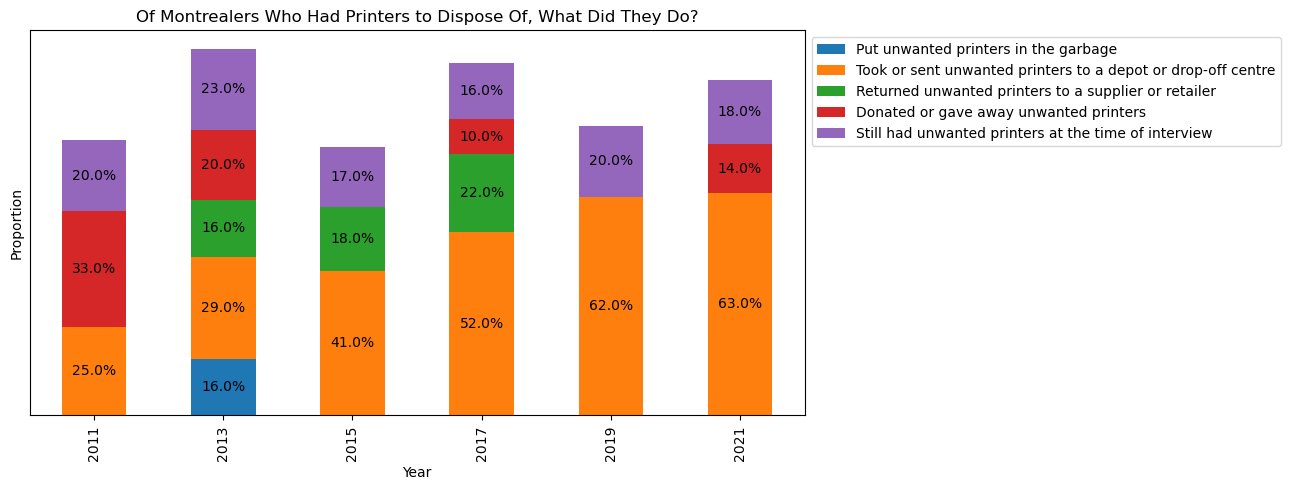

In [20]:
# Plot the stacked bar chart
ax = rest_of_data.plot(x='Year', kind='bar', stacked=True, figsize=(10, 5), title="Of Montrealers Who Had Printers to Dispose Of, What Did They Do?")

# Set metadata
plt.ylabel('Proportion')
plt.yticks([])
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Add percentages to stacks
for c in ax.containers:
    label = c.get_label()
    labels = [f"{num}%" if num != 0 else '' for num in rest_of_data[label].values]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)

# Save the plot
plt.savefig(file_path / 'printers_stacked_plot.png', bbox_inches='tight')

## Process the television-related data only

In [21]:
# Get only the television-related data 
televisions = e_waste[
    (e_waste['Electronic waste'].str.contains('televisions')) & (e_waste.iloc[:, 1:] != 0).any(axis=1)
    # (e_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)

televisions

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted televisions to dispose of,22.0,20.0,25.0,22.0,15.0,14.0
1,Put unwanted televisions in the garbage,11.0,12.0,0.0,0.0,0.0,0.0
2,Took or sent unwanted televisions to a depot o...,24.0,34.0,47.0,49.0,66.0,59.0
3,Returned unwanted televisions to a supplier or...,0.0,7.0,9.0,16.0,10.0,6.0
4,Donated or gave away unwanted televisions,41.0,27.0,20.0,13.0,0.0,20.0
5,Still had unwanted televisions at the time of ...,21.0,22.0,14.0,17.0,14.0,18.0


In [22]:
# From this, get only the data where the item was unwanted
had_unwanted = televisions[televisions['Electronic waste'] == 'Had unwanted televisions to dispose of'].iloc[:, 1:]
had_unwanted

,2011,2013,2015,2017,2019,2021
0,22.0,20.0,25.0,22.0,15.0,14.0


In [23]:
# Transpose the data for easier plotting
had_unwanted = had_unwanted.T
had_unwanted = had_unwanted.reset_index()
had_unwanted = had_unwanted.rename(columns={'index': 'Year', 0: 'Percentage'})
had_unwanted

,Year,Percentage
0,2011,22.0
1,2013,20.0
2,2015,25.0
3,2017,22.0
4,2019,15.0
5,2021,14.0


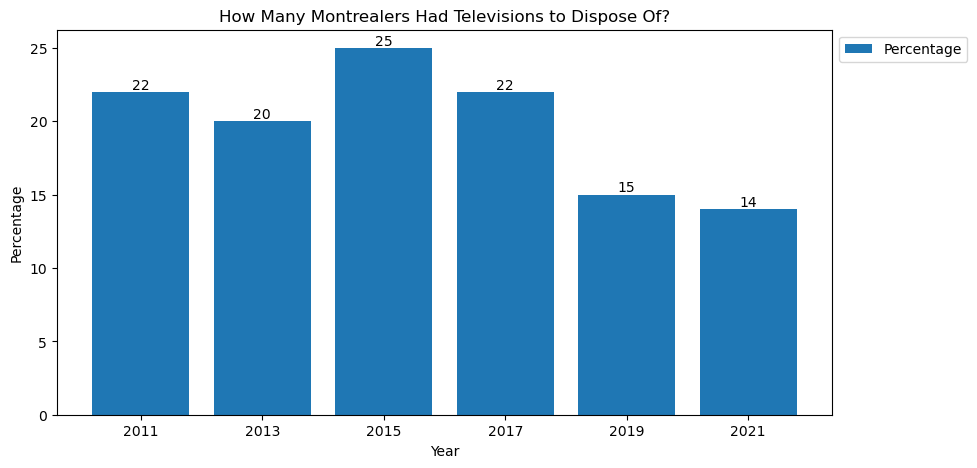

In [24]:
# Create the plot for the unwanted item data
_, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(had_unwanted['Year'], had_unwanted['Percentage'])
ax.bar_label(bars)

plt.title("How Many Montrealers Had Televisions to Dispose Of?")
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.legend([bars], ["Percentage"], loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.savefig(file_path / 'televisions_main_plot.png', bbox_inches='tight')

In [25]:
# Get the rest of the data. i.e. all the data except the unwanted data
rest_of_data = televisions.iloc[1:].T
rest_of_data

,1,2,3,4,5
Electronic waste,Put unwanted televisions in the garbage,Took or sent unwanted televisions to a depot o...,Returned unwanted televisions to a supplier or...,Donated or gave away unwanted televisions,Still had unwanted televisions at the time of ...
2011,11.0,24.0,0.0,41.0,21.0
2013,12.0,34.0,7.0,27.0,22.0
2015,0.0,47.0,9.0,20.0,14.0
2017,0.0,49.0,16.0,13.0,17.0
2019,0.0,66.0,10.0,0.0,14.0
2021,0.0,59.0,6.0,20.0,18.0


In [26]:
# Manipulate the DataFrame to be more appropriate for stacked bar charts
rest_of_data.columns = rest_of_data.iloc[0].values

rest_of_data = rest_of_data.reset_index()
rest_of_data = rest_of_data.iloc[1:]
rest_of_data = rest_of_data.rename(columns={'index': 'Year'})
rest_of_data

,Year,Put unwanted televisions in the garbage,Took or sent unwanted televisions to a depot or drop-off centre,Returned unwanted televisions to a supplier or retailer,Donated or gave away unwanted televisions,Still had unwanted televisions at the time of interview
1,2011,11.0,24.0,0.0,41.0,21.0
2,2013,12.0,34.0,7.0,27.0,22.0
3,2015,0.0,47.0,9.0,20.0,14.0
4,2017,0.0,49.0,16.0,13.0,17.0
5,2019,0.0,66.0,10.0,0.0,14.0
6,2021,0.0,59.0,6.0,20.0,18.0


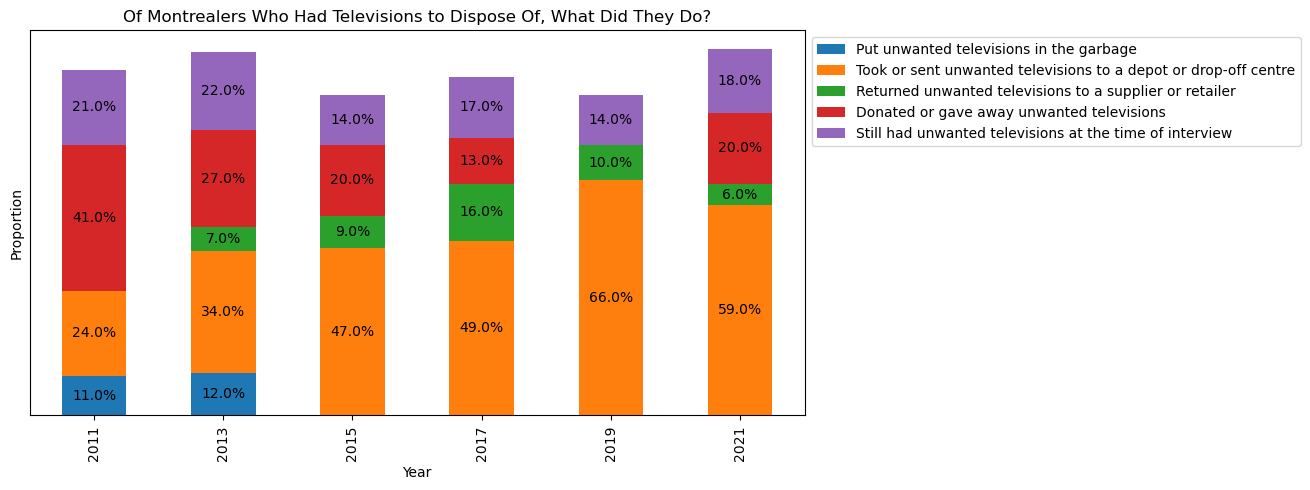

In [27]:
# Plot the stacked bar chart
ax = rest_of_data.plot(x='Year', kind='bar', stacked=True, figsize=(10, 5), title="Of Montrealers Who Had Televisions to Dispose Of, What Did They Do?")

plt.ylabel('Proportion')
plt.yticks([])
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Add percentages to stacks
for c in ax.containers:
    label = c.get_label()
    labels = [f"{num}%" if num != 0 else '' for num in rest_of_data[label].values]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)

plt.savefig(file_path / 'televisions_stacked_plot.png', bbox_inches='tight')

## Process the av-equipment-related data only

In [28]:
# Get only the av-equipment-related data 
av_equipment = e_waste[
    (e_waste['Electronic waste'].str.contains('audio visual equipment')) & (e_waste.iloc[:, 1:] != 0).any(axis=1)
    # (e_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)

av_equipment

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted audio visual equipment to dispose of,9.0,10.0,8.0,13.0,12.0,11.0
1,Took or sent unwanted audio visual equipment t...,27.0,35.0,55.0,44.0,62.0,65.0
2,Donated or gave away unwanted audio visual equ...,28.0,17.0,0.0,0.0,0.0,11.0
3,Still had unwanted audio visual equipment at t...,0.0,32.0,0.0,21.0,21.0,24.0


In [29]:
# From this, get only the data where the item was unwanted
had_unwanted = av_equipment[av_equipment['Electronic waste'] == 'Had unwanted audio visual equipment to dispose of'].iloc[:, 1:]
had_unwanted

,2011,2013,2015,2017,2019,2021
0,9.0,10.0,8.0,13.0,12.0,11.0


In [30]:
# Transpose the data for easier plotting
had_unwanted = had_unwanted.T
had_unwanted = had_unwanted.reset_index()
had_unwanted = had_unwanted.rename(columns={'index': 'Year', 0: 'Percentage'})
had_unwanted

,Year,Percentage
0,2011,9.0
1,2013,10.0
2,2015,8.0
3,2017,13.0
4,2019,12.0
5,2021,11.0


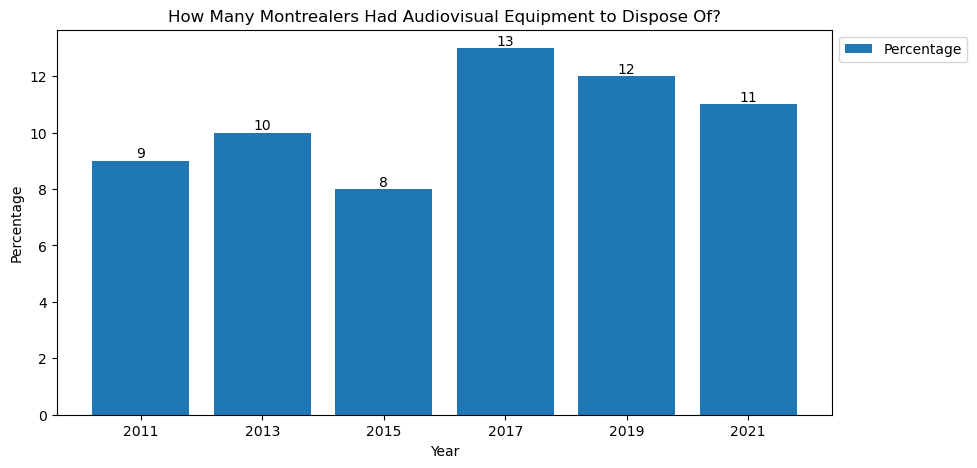

In [31]:
# Create the plot for the unwanted item data
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(had_unwanted['Year'], had_unwanted['Percentage'])
ax.bar_label(bars)

plt.title("How Many Montrealers Had Audiovisual Equipment to Dispose Of?")
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.legend([bars], ["Percentage"], loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.savefig(file_path / 'av_main_plot.png', bbox_inches='tight')

In [32]:
# Get the rest of the data. i.e. all the data except the unwanted data
rest_of_data = av_equipment.iloc[1:].T
rest_of_data

,1,2,3
Electronic waste,Took or sent unwanted audio visual equipment t...,Donated or gave away unwanted audio visual equ...,Still had unwanted audio visual equipment at t...
2011,27.0,28.0,0.0
2013,35.0,17.0,32.0
2015,55.0,0.0,0.0
2017,44.0,0.0,21.0
2019,62.0,0.0,21.0
2021,65.0,11.0,24.0


In [33]:
# Manipulate the DataFrame to be more appropriate for stacked bar charts
rest_of_data.columns = rest_of_data.iloc[0].values

rest_of_data = rest_of_data.reset_index()
rest_of_data = rest_of_data.iloc[1:]
rest_of_data = rest_of_data.rename(columns={'index': 'Year'})
rest_of_data

,Year,Took or sent unwanted audio visual equipment to a depot or drop-off centre,Donated or gave away unwanted audio visual equipment,Still had unwanted audio visual equipment at the time of interview
1,2011,27.0,28.0,0.0
2,2013,35.0,17.0,32.0
3,2015,55.0,0.0,0.0
4,2017,44.0,0.0,21.0
5,2019,62.0,0.0,21.0
6,2021,65.0,11.0,24.0


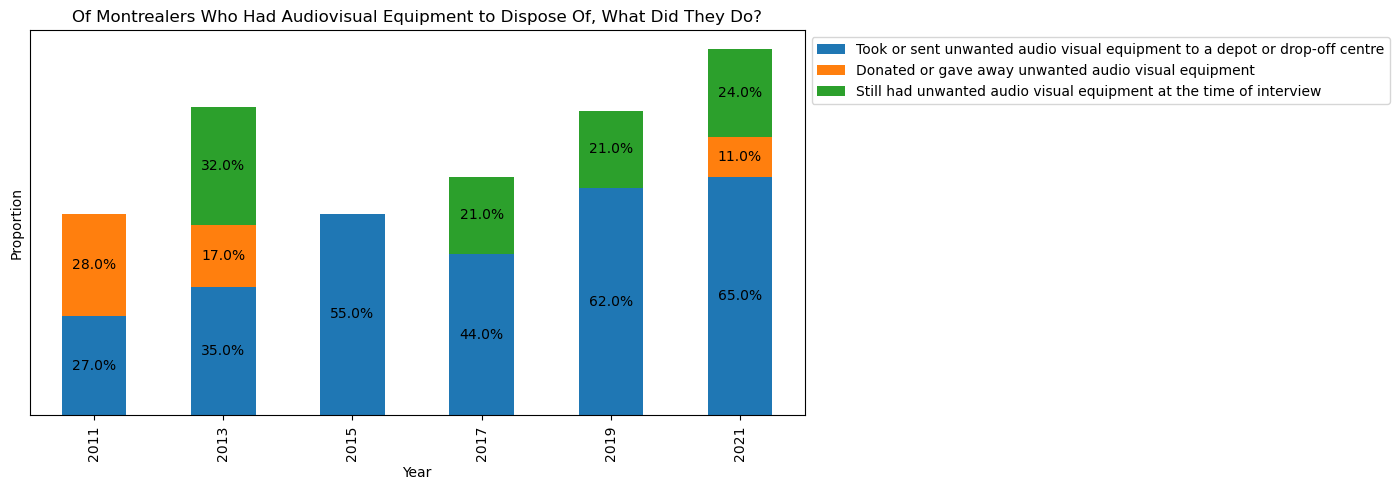

In [34]:
# Plot the stacked bar chart
ax = rest_of_data.plot(x='Year', kind='bar', stacked=True, figsize=(10, 5), title="Of Montrealers Who Had Audiovisual Equipment to Dispose Of, What Did They Do?")

plt.ylabel('Proportion')
plt.yticks([])
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Add percentages to stacks
for c in ax.containers:
    label = c.get_label()
    labels = [f"{num}%" if num != 0 else '' for num in rest_of_data[label].values]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)

plt.savefig(file_path / 'av_stacked_plot.png', bbox_inches='tight')

## Process the cellphone-related data only

In [35]:
# Get only the cellphone-related data 
cellphones = e_waste[
    (e_waste['Electronic waste'].str.contains('cellular phone')) & (e_waste.iloc[:, 1:] != 0).any(axis=1)
    # (e_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)

cellphones

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted cellular phones to dispose of,20.0,18.0,18.0,20.0,20.0,17.0
1,Took or sent unwanted cellular phones to a dep...,20.0,16.0,31.0,31.0,35.0,44.0
2,Returned unwanted cellular phones to a supplie...,21.0,24.0,18.0,21.0,17.0,12.0
3,Donated or gave away unwanted cellular phones,0.0,0.0,0.0,10.0,11.0,13.0
4,Still had unwanted cellular phones at the time...,47.0,51.0,38.0,35.0,36.0,35.0


In [36]:
# From this, get only the data where the item was unwanted
had_unwanted = cellphones[cellphones['Electronic waste'] == 'Had unwanted cellular phones to dispose of'].iloc[:, 1:]
had_unwanted

,2011,2013,2015,2017,2019,2021
0,20.0,18.0,18.0,20.0,20.0,17.0


In [37]:
# Transpose the data for easier plotting
had_unwanted = had_unwanted.T
had_unwanted = had_unwanted.reset_index()
had_unwanted = had_unwanted.rename(columns={'index': 'Year', 0: 'Percentage'})
had_unwanted

,Year,Percentage
0,2011,20.0
1,2013,18.0
2,2015,18.0
3,2017,20.0
4,2019,20.0
5,2021,17.0


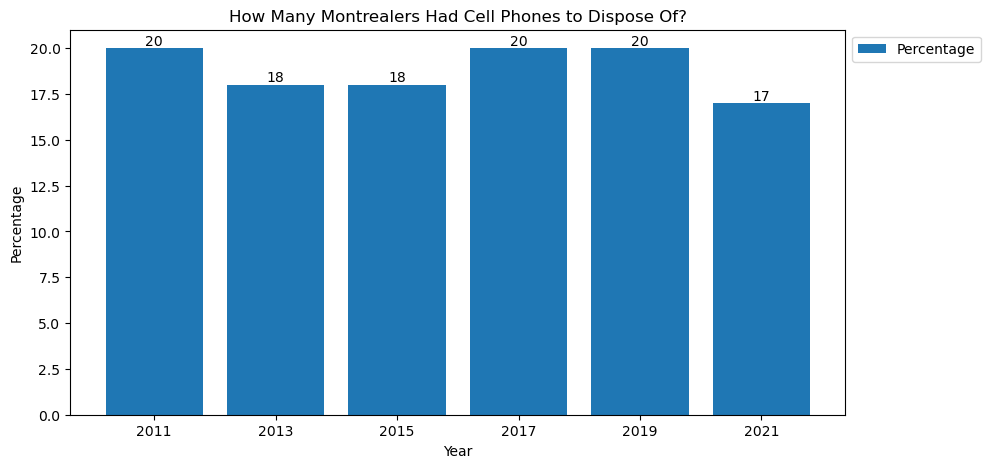

In [38]:
# Create the plot for the unwanted item data
_, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(had_unwanted['Year'], had_unwanted['Percentage'])
ax.bar_label(bars)

plt.title("How Many Montrealers Had Cell Phones to Dispose Of?")
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.legend([bars], ["Percentage"], loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.savefig(file_path / 'phones_main_plot.png', bbox_inches='tight')

In [39]:
# Get the rest of the data. i.e. all the data except the unwanted data
rest_of_data = cellphones.iloc[1:].T
rest_of_data

,1,2,3,4
Electronic waste,Took or sent unwanted cellular phones to a dep...,Returned unwanted cellular phones to a supplie...,Donated or gave away unwanted cellular phones,Still had unwanted cellular phones at the time...
2011,20.0,21.0,0.0,47.0
2013,16.0,24.0,0.0,51.0
2015,31.0,18.0,0.0,38.0
2017,31.0,21.0,10.0,35.0
2019,35.0,17.0,11.0,36.0
2021,44.0,12.0,13.0,35.0


In [40]:
# Manipulate the DataFrame to be more appropriate for stacked bar charts
rest_of_data.columns = rest_of_data.iloc[0].values

rest_of_data = rest_of_data.reset_index()
rest_of_data = rest_of_data.iloc[1:]
rest_of_data = rest_of_data.rename(columns={'index': 'Year'})
rest_of_data

,Year,Took or sent unwanted cellular phones to a depot or drop-off centre,Returned unwanted cellular phones to a supplier or retailer,Donated or gave away unwanted cellular phones,Still had unwanted cellular phones at the time of interview
1,2011,20.0,21.0,0.0,47.0
2,2013,16.0,24.0,0.0,51.0
3,2015,31.0,18.0,0.0,38.0
4,2017,31.0,21.0,10.0,35.0
5,2019,35.0,17.0,11.0,36.0
6,2021,44.0,12.0,13.0,35.0


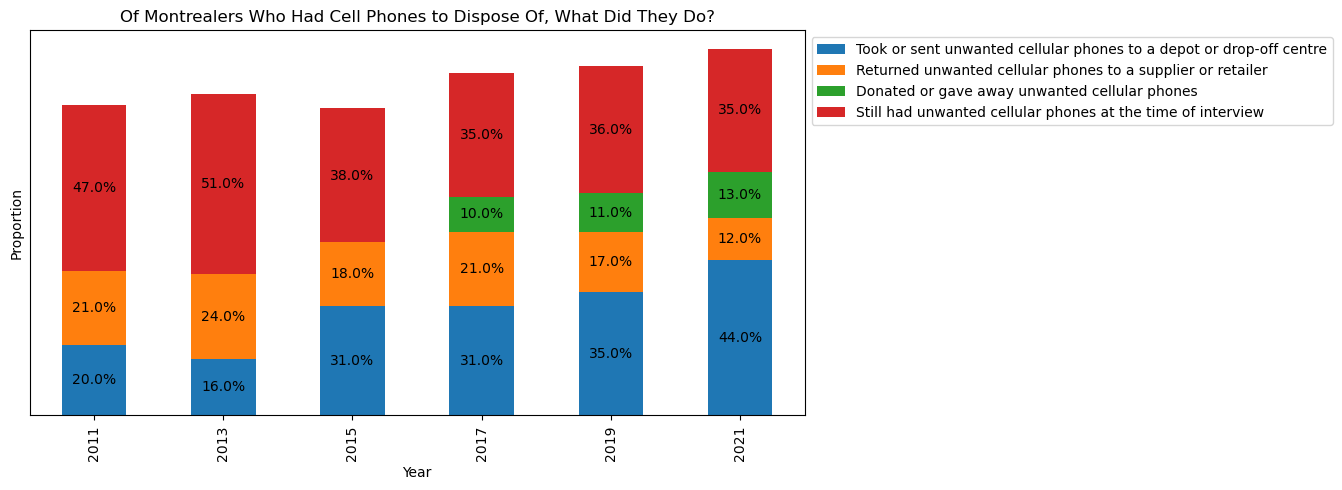

In [41]:
# Plot the stacked bar chart
ax = rest_of_data.plot(x='Year', kind='bar', stacked=True, figsize=(10, 5), title="Of Montrealers Who Had Cell Phones to Dispose Of, What Did They Do?")

plt.ylabel('Proportion')
plt.yticks([])
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Add percentages to stacks
for c in ax.containers:
    label = c.get_label()
    labels = [f"{num}%" if num != 0 else '' for num in rest_of_data[label].values]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)

plt.savefig(file_path / 'phones_stacked_plot.png', bbox_inches='tight')

## Process the landline-related data only

In [42]:
# Get only the landline-related data
landlines = e_waste[
    (e_waste['Electronic waste'].str.contains('landline telephone')) & (e_waste.iloc[:, 1:] != 0).any(axis=1)
    # (e_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)

landlines

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted landline telephones to dispose of,0.0,0.0,0.0,8.0,6.0,6.0
1,Took or sent unwanted landline telephones to a...,0.0,0.0,0.0,32.0,52.0,45.0
2,Still had unwanted landline telephones at the ...,0.0,0.0,0.0,33.0,30.0,29.0


In [43]:
# From this, get only the data where the item was unwanted
had_unwanted = landlines[landlines['Electronic waste'] == 'Had unwanted landline telephones to dispose of'].iloc[:, 1:]
had_unwanted

,2011,2013,2015,2017,2019,2021
0,0.0,0.0,0.0,8.0,6.0,6.0


In [44]:
# Transpose the data for easier plotting
had_unwanted = had_unwanted.T
had_unwanted = had_unwanted.reset_index()
had_unwanted = had_unwanted.rename(columns={'index': 'Year', 0: 'Percentage'})
had_unwanted

,Year,Percentage
0,2011,0.0
1,2013,0.0
2,2015,0.0
3,2017,8.0
4,2019,6.0
5,2021,6.0


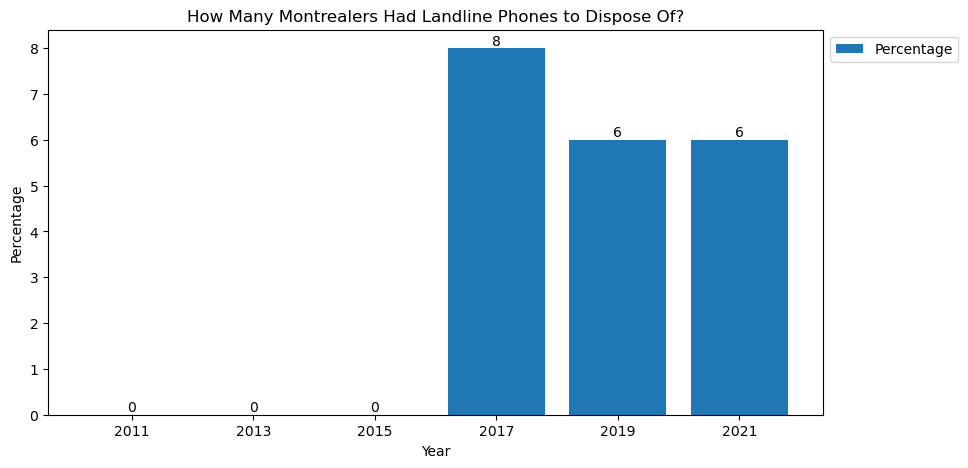

In [45]:
# Create the plot for the unwanted item data
_, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(had_unwanted['Year'], had_unwanted['Percentage'])
ax.bar_label(bars)

plt.title("How Many Montrealers Had Landline Phones to Dispose Of?")
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.legend([bars], ["Percentage"], loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.savefig(file_path / 'landlines_main_plot.png', bbox_inches='tight')

In [46]:
# Get the rest of the data. i.e. all the data except the unwanted data
rest_of_data = landlines.iloc[1:].T
rest_of_data

,1,2
Electronic waste,Took or sent unwanted landline telephones to a...,Still had unwanted landline telephones at the ...
2011,0.0,0.0
2013,0.0,0.0
2015,0.0,0.0
2017,32.0,33.0
2019,52.0,30.0
2021,45.0,29.0


In [47]:
# Manipulate the DataFrame to be more appropriate for stacked bar charts
rest_of_data.columns = rest_of_data.iloc[0].values

rest_of_data = rest_of_data.reset_index()
rest_of_data = rest_of_data.iloc[1:]
rest_of_data = rest_of_data.rename(columns={'index': 'Year'})
rest_of_data

,Year,Took or sent unwanted landline telephones to a depot or drop-off centre,Still had unwanted landline telephones at the time of interview
1,2011,0.0,0.0
2,2013,0.0,0.0
3,2015,0.0,0.0
4,2017,32.0,33.0
5,2019,52.0,30.0
6,2021,45.0,29.0


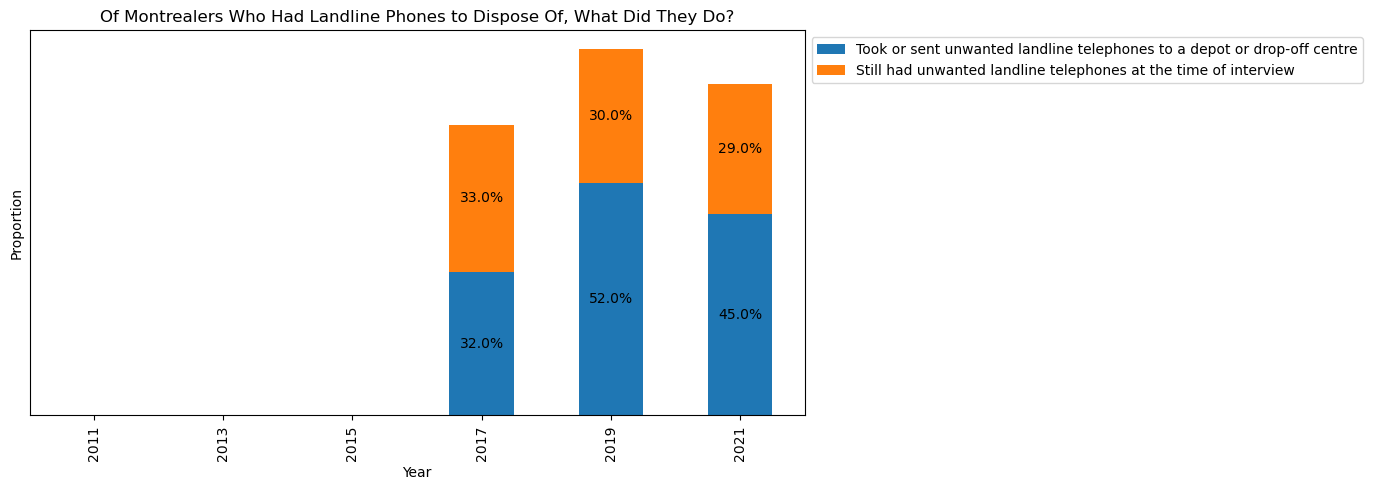

In [48]:
# Plot the stacked bar chart
ax = rest_of_data.plot(x='Year', kind='bar', stacked=True, figsize=(10, 5), title="Of Montrealers Who Had Landline Phones to Dispose Of, What Did They Do?")

plt.ylabel('Proportion')
plt.yticks([])
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Add percentages to stacks
for c in ax.containers:
    label = c.get_label()
    labels = [f"{num}%" if num != 0 else '' for num in rest_of_data[label].values]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)

plt.savefig(file_path / 'landlines_stacked_plot.png', bbox_inches='tight')

## Process the microwave-related data only

In [49]:
# Get only the microwave-related data
microwaves = e_waste[
    (e_waste['Electronic waste'].str.contains('microwave oven')) & (e_waste.iloc[:, 1:] != 0).any(axis=1)
    # (e_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)

microwaves

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted microwave ovens to dispose of,0.0,0.0,0.0,6.0,6.0,5.0
1,Took or sent unwanted microwave ovens to a dep...,0.0,0.0,0.0,34.0,48.0,45.0
2,Donated or gave away unwanted microwave ovens,0.0,0.0,0.0,22.0,0.0,24.0


In [50]:
# From this, get only the data where the item was unwanted
had_unwanted = microwaves[microwaves['Electronic waste'] == 'Had unwanted microwave ovens to dispose of'].iloc[:, 1:]
had_unwanted

,2011,2013,2015,2017,2019,2021
0,0.0,0.0,0.0,6.0,6.0,5.0


In [51]:
# Transpose the data for easier plotting
had_unwanted = had_unwanted.T
had_unwanted = had_unwanted.reset_index()
had_unwanted = had_unwanted.rename(columns={'index': 'Year', 0: 'Percentage'})
had_unwanted

,Year,Percentage
0,2011,0.0
1,2013,0.0
2,2015,0.0
3,2017,6.0
4,2019,6.0
5,2021,5.0


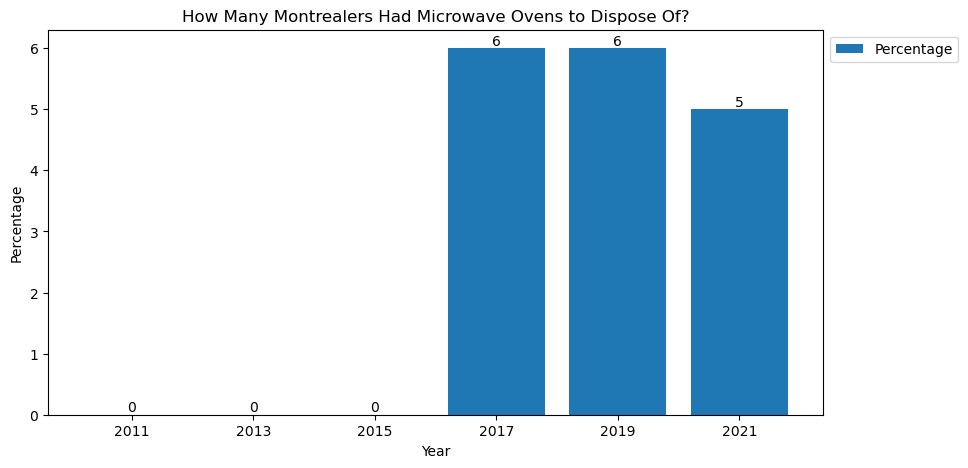

In [52]:
# Create the plot for the unwanted item data
_, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(had_unwanted['Year'], had_unwanted['Percentage'])
ax.bar_label(bars)

plt.title("How Many Montrealers Had Microwave Ovens to Dispose Of?")
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.legend([bars], ["Percentage"], loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.savefig(file_path / 'microwaves_main_plot.png', bbox_inches='tight')

In [53]:
# Get the rest of the data. i.e. all the data except the unwanted data
rest_of_data = microwaves.iloc[1:].T
rest_of_data

,1,2
Electronic waste,Took or sent unwanted microwave ovens to a dep...,Donated or gave away unwanted microwave ovens
2011,0.0,0.0
2013,0.0,0.0
2015,0.0,0.0
2017,34.0,22.0
2019,48.0,0.0
2021,45.0,24.0


In [54]:
# Manipulate the DataFrame to be more appropriate for stacked bar charts
rest_of_data.columns = rest_of_data.iloc[0].values

rest_of_data = rest_of_data.reset_index()
rest_of_data = rest_of_data.iloc[1:]
rest_of_data = rest_of_data.rename(columns={'index': 'Year'})
rest_of_data

,Year,Took or sent unwanted microwave ovens to a depot or drop-off centre,Donated or gave away unwanted microwave ovens
1,2011,0.0,0.0
2,2013,0.0,0.0
3,2015,0.0,0.0
4,2017,34.0,22.0
5,2019,48.0,0.0
6,2021,45.0,24.0


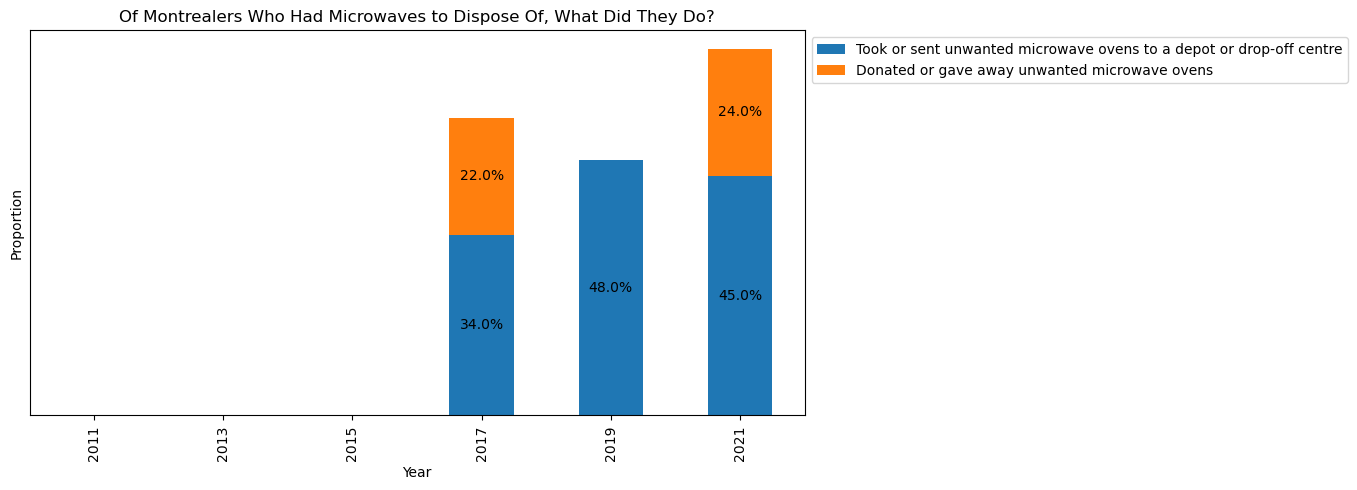

In [55]:
# Plot the stacked bar chart
ax = rest_of_data.plot(x='Year', kind='bar', stacked=True, figsize=(10, 5), title="Of Montrealers Who Had Microwaves to Dispose Of, What Did They Do?")

plt.ylabel('Proportion')
plt.yticks([])
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Add percentages to stacks
for c in ax.containers:
    label = c.get_label()
    labels = [f"{num}%" if num != 0 else '' for num in rest_of_data[label].values]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)

plt.savefig(file_path / 'microwaves_stacked_plot.png', bbox_inches='tight')

## Process the gaming-related data only

In [56]:
# Get only the gaming-related data
gaming = e_waste[
    (e_waste['Electronic waste'].str.contains('electronic gaming equipment')) & (e_waste.iloc[:, 1:] != 0).any(axis=1)
    # (e_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)

gaming

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted electronic gaming equipment to di...,2.0,3.0,3.0,3.0,4.0,3.0
1,Took or sent unwanted electronic gaming equipm...,0.0,0.0,0.0,0.0,0.0,52.0


In [57]:
# From this, get only the data where the item was unwanted
had_unwanted = gaming[gaming['Electronic waste'] == 'Had unwanted electronic gaming equipment to dispose of'].iloc[:, 1:]
had_unwanted

,2011,2013,2015,2017,2019,2021
0,2.0,3.0,3.0,3.0,4.0,3.0


In [58]:
# Transpose the data for easier plotting
had_unwanted = had_unwanted.T
had_unwanted = had_unwanted.reset_index()
had_unwanted = had_unwanted.rename(columns={'index': 'Year', 0: 'Percentage'})
had_unwanted

,Year,Percentage
0,2011,2.0
1,2013,3.0
2,2015,3.0
3,2017,3.0
4,2019,4.0
5,2021,3.0


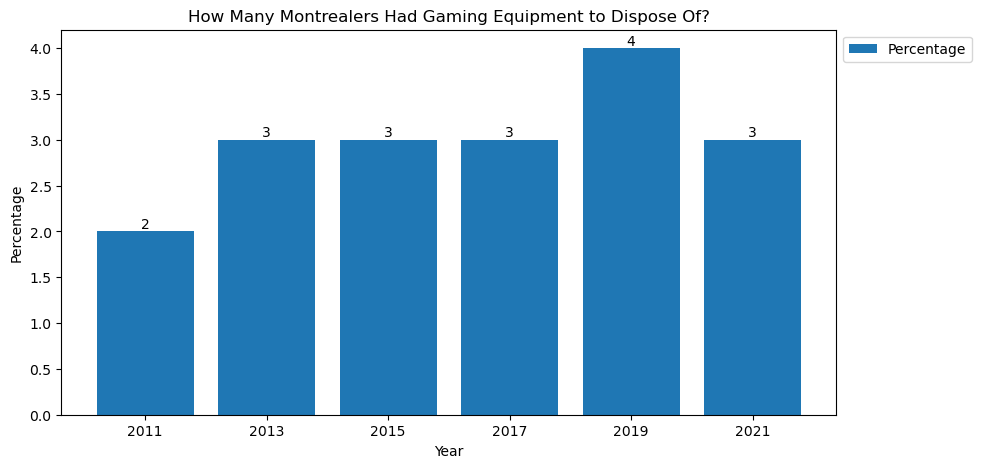

In [59]:
# Create the plot for the unwanted item data
_, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(had_unwanted['Year'], had_unwanted['Percentage'])
ax.bar_label(bars)

plt.title("How Many Montrealers Had Gaming Equipment to Dispose Of?")
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.legend([bars], ["Percentage"], loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.savefig(file_path / 'gaming_main_plot.png', bbox_inches='tight')

In [60]:
# Get the rest of the data. i.e. all the data except the unwanted data
rest_of_data = gaming.iloc[1:].T
rest_of_data

,1
Electronic waste,Took or sent unwanted electronic gaming equipm...
2011,0.0
2013,0.0
2015,0.0
2017,0.0
2019,0.0
2021,52.0


In [61]:
# Manipulate the DataFrame to be more appropriate for stacked bar charts
rest_of_data.columns = rest_of_data.iloc[0].values

rest_of_data = rest_of_data.reset_index()
rest_of_data = rest_of_data.iloc[1:]
rest_of_data = rest_of_data.rename(columns={'index': 'Year'})
rest_of_data

,Year,Took or sent unwanted electronic gaming equipment to a depot or drop-off centre
1,2011,0.0
2,2013,0.0
3,2015,0.0
4,2017,0.0
5,2019,0.0
6,2021,52.0


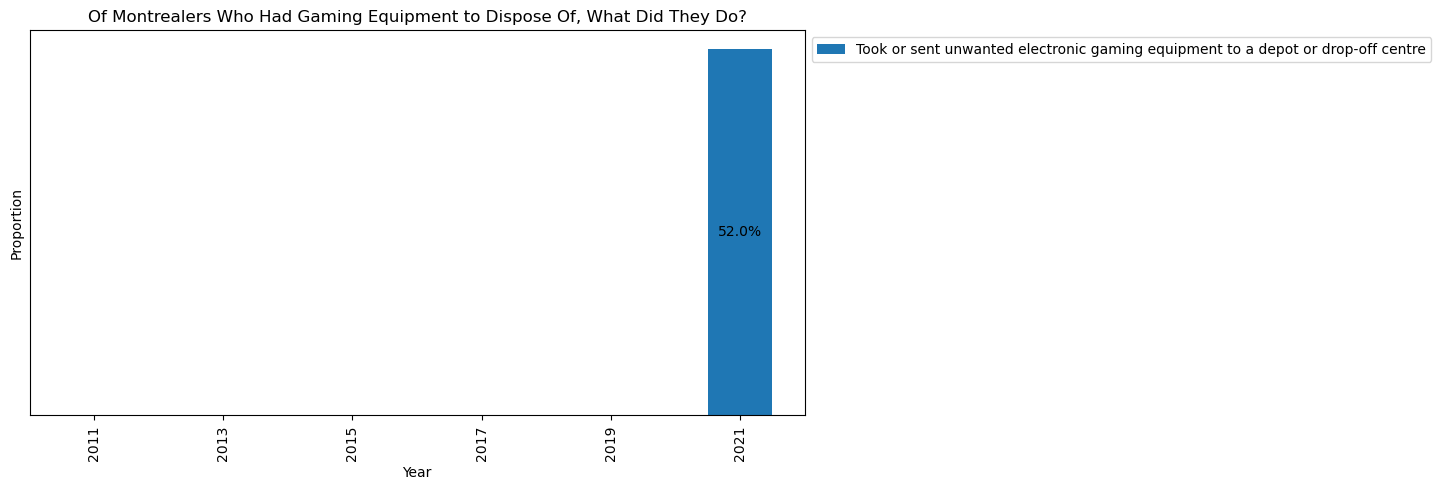

In [62]:
# Plot the stacked bar chart
ax = rest_of_data.plot(x='Year', kind='bar', stacked=True, figsize=(10, 5), title="Of Montrealers Who Had Gaming Equipment to Dispose Of, What Did They Do?")

plt.ylabel('Proportion')
plt.yticks([])
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Add percentages to stacks
for c in ax.containers:
    label = c.get_label()
    labels = [f"{num}%" if num != 0 else '' for num in rest_of_data[label].values]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)

plt.savefig(file_path / 'gaming_stacked_plot.png', bbox_inches='tight')